In [167]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [168]:
%autoreload
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from utilities_data import *

In [169]:
import sys
sys.path.insert(0, '../')
from constants import *
from utilities import *
from constants_augmented import*
sys.path.insert(0, '../RF')
from utilities_RF import *

In [170]:
added_fetures = "dif_dat_rad", "cos" , "sin"

In [171]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',             
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
#'direct_rad:W',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms',
                    "dif_dat_rad","day","month","hour_sin", "hour_cos", ]
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}
Best_parameters_a = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best_parameters_b= {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best_parameters_c = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

In [172]:
rf_a = Random_Forest(Best_parameters_a, subset_X_observed_a, X_estimated_a, y_a, selected_features)
rf_a.fit()
rf_a.pred()

rf_b = Random_Forest(Best_parameters_b, subset_X_observed_b, X_estimated_b, y_b, selected_features)
rf_b.fit()
rf_b.pred()

rf_c = Random_Forest(Best_parameters_c, subset_X_observed_c, X_estimated_c, y_c, selected_features)
rf_c.fit()
rf_c.pred()

In [173]:
#Evaluate mean asbolute error
mae_a = rf_a.mae()
print("A: Mean Absolute Error:", mae_a)

mae_b = rf_b.mae()
print("B: Mean Absolute Error:", mae_b)

mae_c = rf_c.mae()
print("C: Mean Absolute Error:", mae_c)

A: Mean Absolute Error: 231.36324679869549
B: Mean Absolute Error: 33.10792606116678
C: Mean Absolute Error: 16.003983715854098


In [174]:
rf_a.pred(X_test_a)
rf_b.pred(X_test_b)
rf_c.pred(X_test_c)

y_pred_rf_test = np.concatenate((rf_a.prediction, rf_b.prediction, rf_c.prediction), axis=0)
y_pred_rf_valid = np.concatenate((rf_a.pred_estimated, rf_b.pred_estimated, rf_c.pred_estimated), axis=0)

In [175]:
submission("rf_med_diff_dat_og_augmented_y_day_and_month_new_parameters_3.csv", y_pred_rf_test, "../../")

absolute_humidity_2m:gm3: 0.002571084042998611
air_density_2m:kgm3: 0.005559824981701171
clear_sky_energy_1h:J: 0.00465450751961489
clear_sky_rad:W: 0.3613461066214898
dew_or_rime:idx: 8.514993080832427e-07
dew_point_2m:K: 0.003249211354558089
diffuse_rad:W: 0.05657009250187248
diffuse_rad_1h:J: 0.004546505754027396
direct_rad_1h:J: 0.3716837125094415
effective_cloud_cover:p: 0.006997349536841715
elevation:m: 0.0
fresh_snow_12h:cm: 5.2205236515258515e-05
fresh_snow_1h:cm: 5.003238546761733e-07
fresh_snow_24h:cm: 0.00037705260432341196
fresh_snow_3h:cm: 1.1372684492047072e-06
fresh_snow_6h:cm: 1.3601241078064657e-05
is_day:idx: 3.280611669116823e-07
is_in_shadow:idx: 2.835994073767597e-06
msl_pressure:hPa: 0.002618896562591503
precip_5min:mm: 0.001345750558739236
precip_type_5min:idx: 0.0009918361246558532
pressure_100m:hPa: 0.0027853105436055547
pressure_50m:hPa: 0.002123916929667479
prob_rime:p: 1.5427666703870315e-06
rain_water:kgm2: 0.00019007218494641
relative_humidity_1000hPa:p: 0

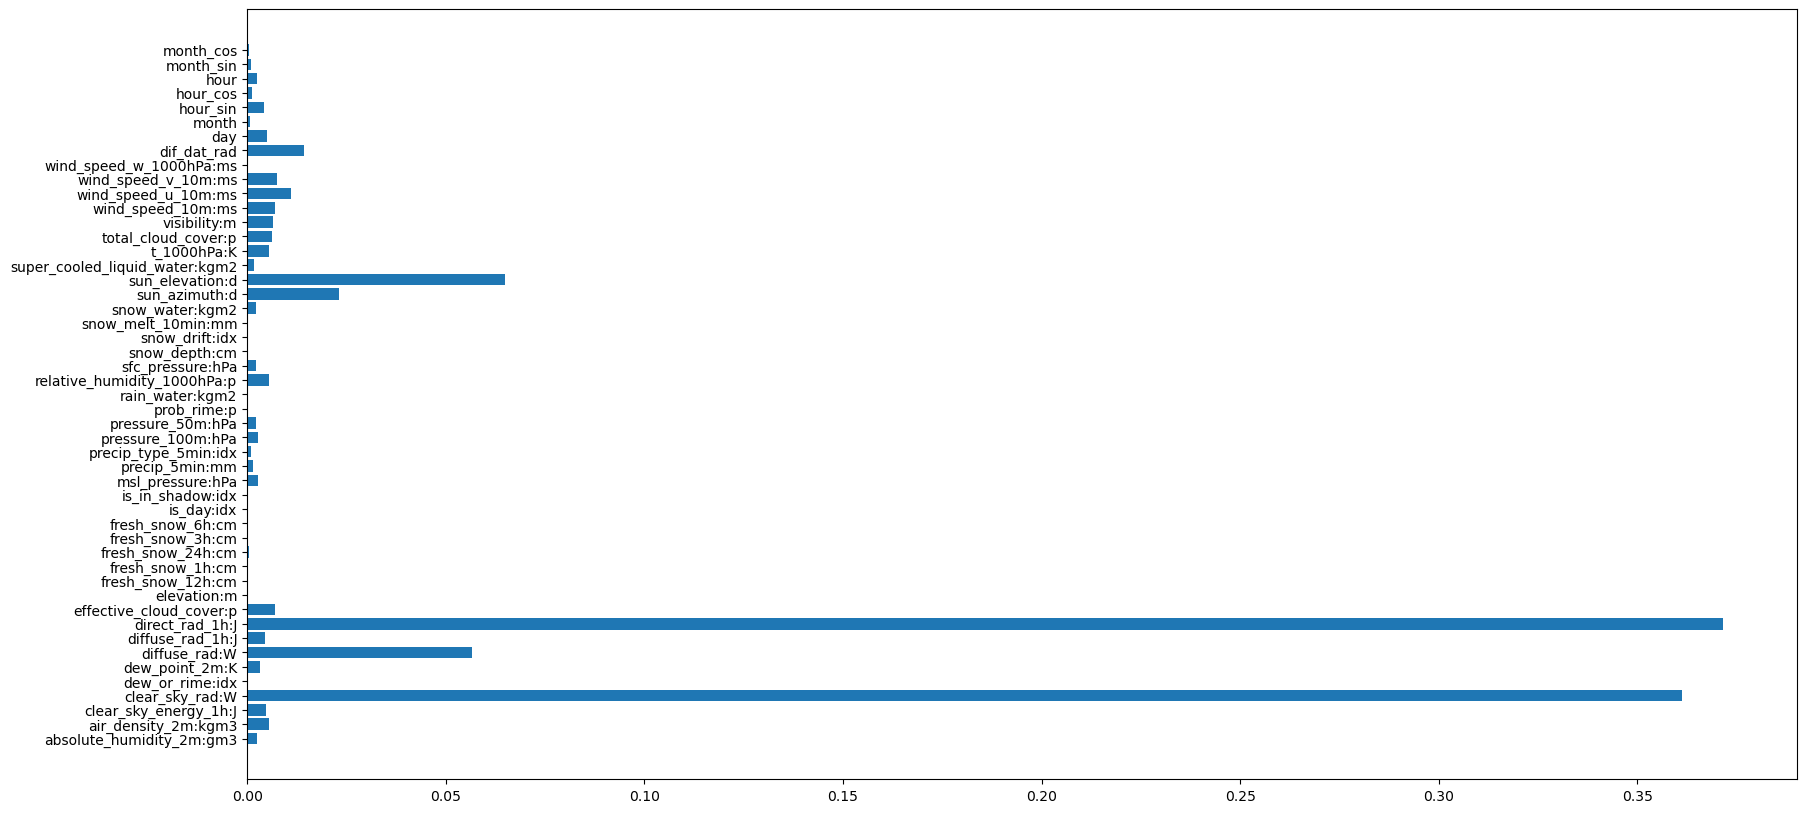

In [176]:
rf_a.feature_importence_plot()

absolute_humidity_2m:gm3: 0.002659337188989191
air_density_2m:kgm3: 0.0038975021977754273
clear_sky_energy_1h:J: 0.0075449774371762375
clear_sky_rad:W: 0.32740369415834286
dew_or_rime:idx: 1.9404844246213027e-11
dew_point_2m:K: 0.0028857761862551923
diffuse_rad:W: 0.03206963262299046
diffuse_rad_1h:J: 0.00428504599538969
direct_rad_1h:J: 0.1235318516275814
effective_cloud_cover:p: 0.009938126471941379
elevation:m: 0.0
fresh_snow_12h:cm: 6.03499126261743e-05
fresh_snow_1h:cm: 2.5063093824039382e-11
fresh_snow_24h:cm: 0.00026688578431857186
fresh_snow_3h:cm: 8.663130546251484e-10
fresh_snow_6h:cm: 4.267836436096773e-07
is_day:idx: 8.623158702483293e-08
is_in_shadow:idx: 1.4937975925375465e-06
msl_pressure:hPa: 0.010414364435817018
precip_5min:mm: 0.000721872309865721
precip_type_5min:idx: 0.00024718092678510157
pressure_100m:hPa: 0.005716088300028742
pressure_50m:hPa: 0.006669295163909711
prob_rime:p: 2.0030442876136568e-11
rain_water:kgm2: 2.7848864271402165e-05
relative_humidity_1000hP

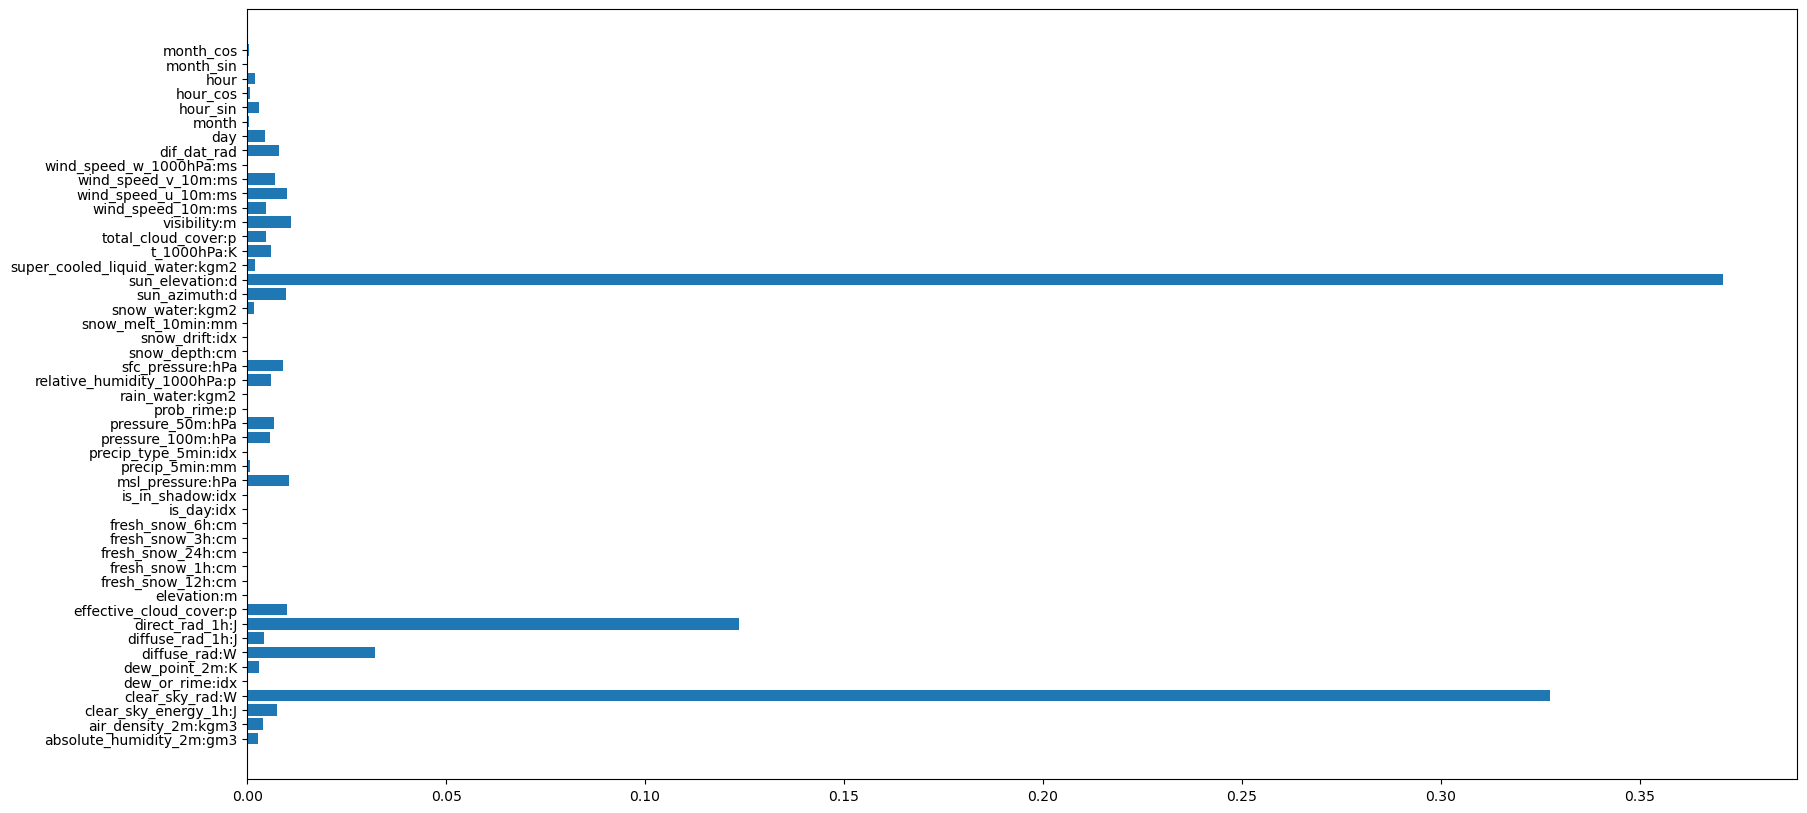

In [177]:
rf_b.feature_importence_plot()

absolute_humidity_2m:gm3: 0.0037262459641672556
air_density_2m:kgm3: 0.004289254646842256
clear_sky_energy_1h:J: 0.3152794908501303
clear_sky_rad:W: 0.047709161244263804
dew_or_rime:idx: 1.2537357680206849e-05
dew_point_2m:K: 0.005462910478499967
diffuse_rad:W: 0.017617465036452073
diffuse_rad_1h:J: 0.006367499701806112
direct_rad_1h:J: 0.1532143243483005
effective_cloud_cover:p: 0.009117816369164458
elevation:m: 0.0
fresh_snow_12h:cm: 0.00027300269679729743
fresh_snow_1h:cm: 1.0394010672432108e-06
fresh_snow_24h:cm: 0.00026113770288849544
fresh_snow_3h:cm: 1.5936374949558372e-06
fresh_snow_6h:cm: 2.4044575909752198e-05
is_day:idx: 6.189859255000049e-07
is_in_shadow:idx: 0.0007098003175750145
msl_pressure:hPa: 0.0030423874481924607
precip_5min:mm: 9.91792869951684e-05
precip_type_5min:idx: 8.246138701557808e-05
pressure_100m:hPa: 0.002651646331741572
pressure_50m:hPa: 0.001977827031505451
prob_rime:p: 6.222902841956787e-06
rain_water:kgm2: 3.2490833200774192e-06
relative_humidity_1000h

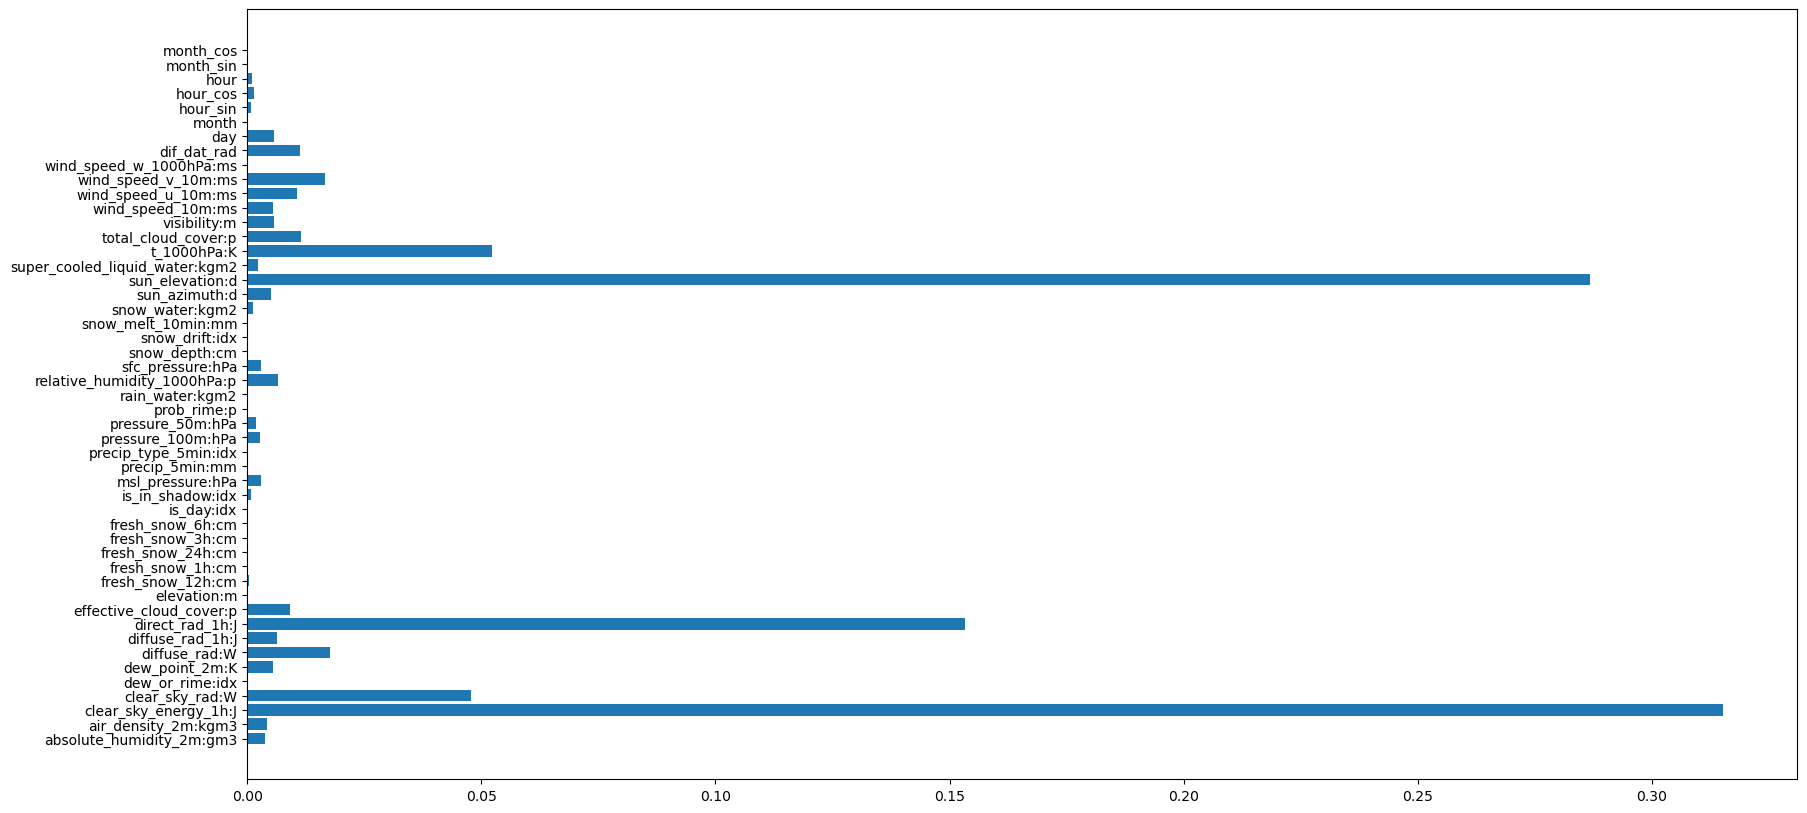

In [178]:
rf_c.feature_importence_plot()

In [179]:
#gav 157.49 uten nye hyperparam uten direct_rad:W', for limit 0.001
selected_fetures_a = ["date_forecast",'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_point_2m:K', 
                      'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'msl_pressure:hPa', 'precip_5min:mm', 
                      'pressure_100m:hPa', 'pressure_50m:hPa', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_water:kgm2', 
                      'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 
                      'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'dif_dat_rad', 'day', 'hour_sin', 'hour_cos', 'hour', 
                      ]

selected_fetures_b = ["date_forecast",'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_point_2m:K', 
                      'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'msl_pressure:hPa', 'pressure_100m:hPa', 
                      'pressure_50m:hPa', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 
                      'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 
                      'wind_speed_v_10m:ms', 'dif_dat_rad', 'day', 'hour_sin', 'hour']

selected_fetures_c = ["date_forecast",'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_point_2m:K', 'diffuse_rad:W', 
                      'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 
                      'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'snow_water:kgm2', 'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 
                      't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'dif_dat_rad', 'day', 
                      'hour_cos', 'hour']


In [192]:

selected_fetures_a_0_002 = ["date_forecast",'air_density_2m:kgm3', 'clear_sky_rad:W', 'diffuse_rad:W', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'relative_humidity_1000hPa:p', 
                             'sun_azimuth:d', 'sun_elevation:d', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 
                             'wind_speed_v_10m:ms', 'dif_dat_rad']

selected_fetures_b_0_002 = ["date_forecast",'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 'dew_point_2m:K', 'diffuse_rad:W', 
                            'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 'msl_pressure:hPa', 'pressure_100m:hPa', 'pressure_50m:hPa', 
                            'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'sun_azimuth:d', 'sun_elevation:d', 't_1000hPa:K', 'total_cloud_cover:p', 
                            'visibility:m', 'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'dif_dat_rad', 'day', 'hour_sin', 'hour']


selected_fetures_c_0_002 = ["date_forecast",'absolute_humidity_2m:gm3', 'air_density_2m:kgm3', 'clear_sky_energy_1h:J', 'clear_sky_rad:W', 
                            'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad_1h:J', 'effective_cloud_cover:p', 
                            'msl_pressure:hPa', 'pressure_100m:hPa', 'relative_humidity_1000hPa:p', 'sfc_pressure:hPa', 'sun_azimuth:d', 
                            'sun_elevation:d', 'super_cooled_liquid_water:kgm2', 't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m', 
                            'wind_speed_10m:ms', 'wind_speed_u_10m:ms', 'wind_speed_v_10m:ms', 'dif_dat_rad', 'day']

In [182]:
X_estimated_a.columns

Index(['date_calc', 'date_forecast', 'absolute_humidity_2m:gm3',
       'air_density_2m:kgm3', 'ceiling_height_agl:m', 'clear_sky_energy_1h:J',
       'clear_sky_rad:W', 'cloud_base_agl:m', 'dew_or_rime:idx',
       'dew_point_2m:K', 'diffuse_rad:W', 'diffuse_rad_1h:J', 'direct_rad:W',
       'direct_rad_1h:J', 'effective_cloud_cover:p', 'elevation:m',
       'fresh_snow_12h:cm', 'fresh_snow_1h:cm', 'fresh_snow_24h:cm',
       'fresh_snow_3h:cm', 'fresh_snow_6h:cm', 'is_day:idx',
       'is_in_shadow:idx', 'msl_pressure:hPa', 'precip_5min:mm',
       'precip_type_5min:idx', 'pressure_100m:hPa', 'pressure_50m:hPa',
       'prob_rime:p', 'rain_water:kgm2', 'relative_humidity_1000hPa:p',
       'sfc_pressure:hPa', 'snow_density:kgm3', 'snow_depth:cm',
       'snow_drift:idx', 'snow_melt_10min:mm', 'snow_water:kgm2',
       'sun_azimuth:d', 'sun_elevation:d', 'super_cooled_liquid_water:kgm2',
       't_1000hPa:K', 'total_cloud_cover:p', 'visibility:m',
       'wind_speed_10m:ms', 'wind_spe

In [196]:
new_hyper_a = get_hyperparameters_for_rf(subset_X_observed_a, X_estimated_a, y_a, selected_fetures_a)
Best parameters b: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Best parameters b: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [197]:
new_hyper_b = get_hyperparameters_for_rf(subset_X_observed_b, X_estimated_b, y_b, selected_fetures_c)
Best parameters b: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Best parameters b: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [198]:
new_hyper_c = get_hyperparameters_for_rf(subset_X_observed_c, X_estimated_c, y_c, selected_fetures_c)
Best parameters b: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best parameters b: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [199]:
rf_a = Random_Forest(new_hyper_a, subset_X_observed_a, X_estimated_a, y_a, selected_fetures_a)
rf_a.fit()
rf_a.pred()

rf_b = Random_Forest(new_hyper_b, subset_X_observed_b, X_estimated_b, y_b, selected_fetures_b)
rf_b.fit()
rf_b.pred()

rf_c = Random_Forest(new_hyper_c, subset_X_observed_c, X_estimated_c, y_c, selected_fetures_c)
rf_c.fit()
rf_c.pred()

In [200]:
rf_a.pred(X_test_a)
rf_b.pred(X_test_b)
rf_c.pred(X_test_c)

y_pred_rf_test = np.concatenate((rf_a.prediction, rf_b.prediction, rf_c.prediction), axis=0)
y_pred_rf_valid = np.concatenate((rf_a.pred_estimated, rf_b.pred_estimated, rf_c.pred_estimated), axis=0)

In [201]:
submission("gustav_tester_nye_parametere_v5.csv", y_pred_rf_test, "../../")